# Value counts of data

The original data is very imbalanced

Text(0, 0.5, '% of total data')

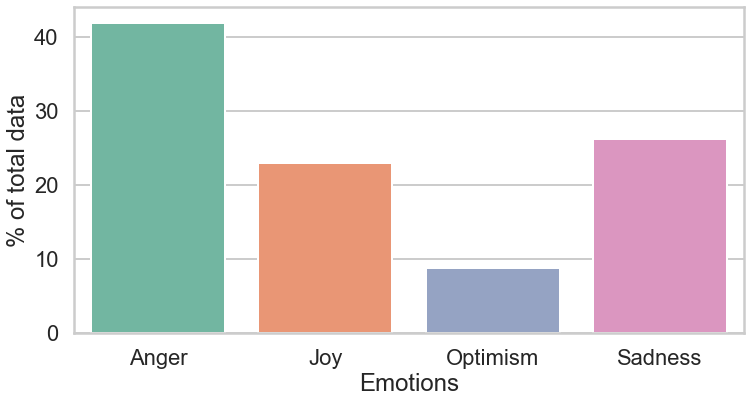

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
y_test = pd.read_csv("Data/y_test.csv")
y_train = pd.read_csv("Data/y_train.csv")
y = pd.concat([y_train, y_test])
sns.set_style("whitegrid")
sns.set_context("poster")
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x= [0, 3, 1, 2], y=y.value_counts(normalize=True).values*100, palette="Set2", ax = ax)
ax.set_xticklabels(["Anger", "Joy", "Optimism", "Sadness"]);
ax.set_xlabel("Emotions")
ax.set_ylabel("% of total data")

# Word clouds

To see which words are more frequent for each emotion

In [2]:
X_train = pd.read_csv("Data/X_train.csv")
X_test = pd.read_csv("Data/X_test.csv")
X = pd.concat([X_train, X_test]).reset_index(drop=True)

In [3]:
X.apply(lambda x: str(x)+'')

tweet    0       @user @user @user Yes, it is bad to po...
dtype: object

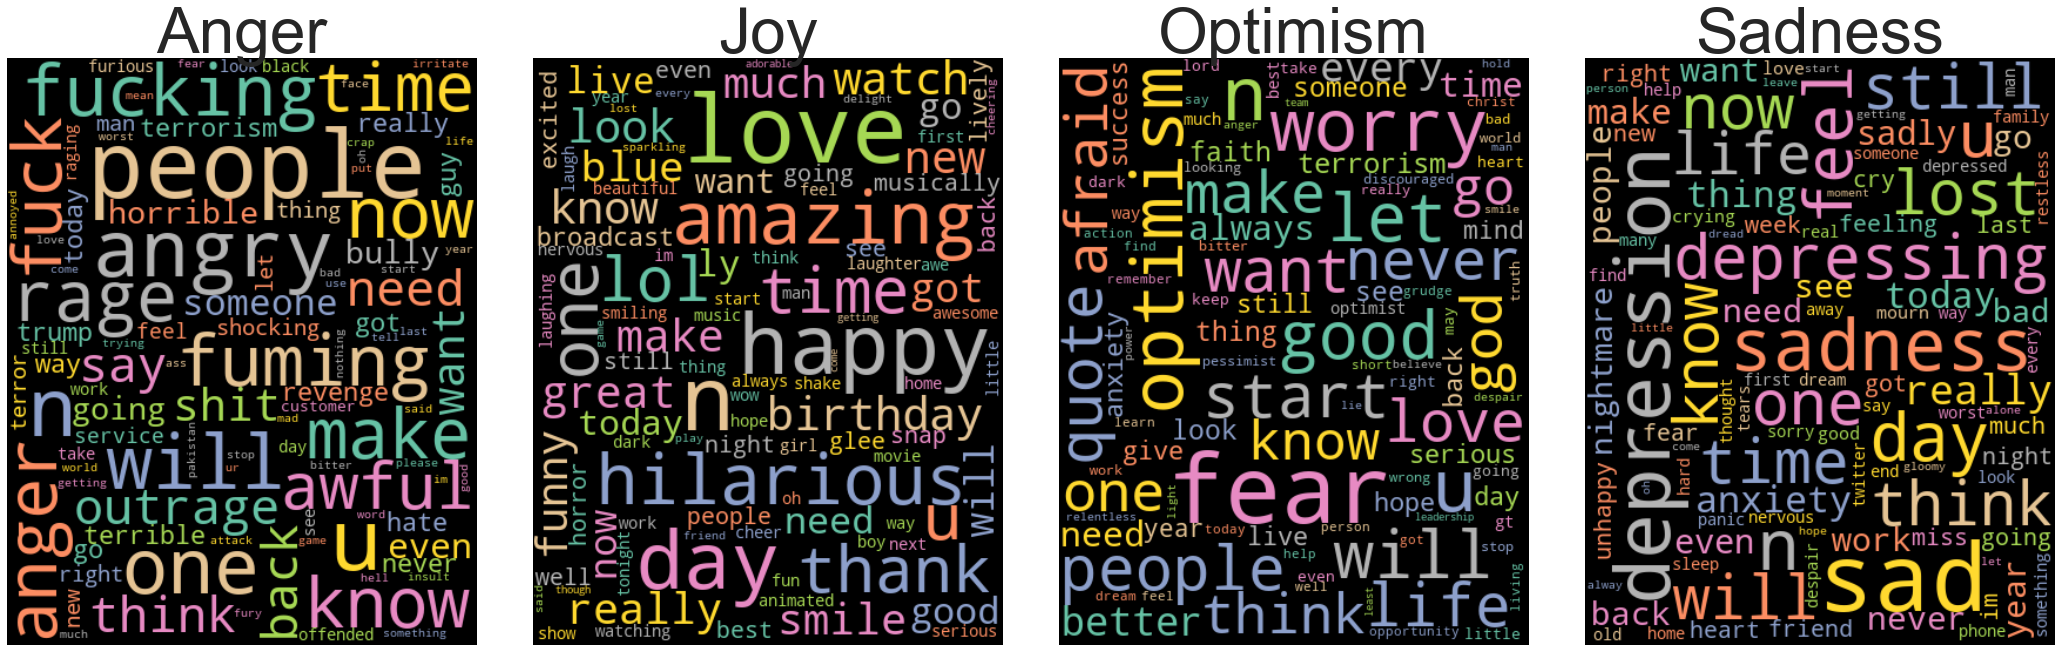

In [4]:
from wordcloud import WordCloud, ImageColorGenerator
from unidecode import unidecode
text_anger = " ".join(str(tweet) for tweet in X.loc[(y==0).label.tolist()].tweet)
text_anger = unidecode(text_anger)
text_anger = text_anger.replace("user", " ").replace("amp", " ").lower()
text_joy = " ".join(str(tweet) for tweet in X.loc[(y==1).label.tolist()].tweet)
text_joy = unidecode(text_joy).lower()
text_joy = text_joy.replace("user", " ").replace("amp", " ").lower()
text_opti = " ".join(str(tweet) for tweet in X.loc[(y==2).label.tolist()].tweet)
text_opti = unidecode(text_opti).lower()
text_opti = text_opti.replace("user", " ").replace("amp", " ").lower()
text_sad = " ".join(str(tweet) for tweet in X.loc[(y==3).label.tolist()].tweet)
text_sad = unidecode(text_sad)
text_sad = text_sad.replace("user", " ").replace("amp", " ").lower()

# Create and generate a word cloud image:
wordcloud_anger = WordCloud(max_font_size=80, max_words=100, width = 400, height = 500, colormap = "Set2",
                     collocations=False).generate(text_anger)
wordcloud_joy = WordCloud(max_font_size=80, max_words=100, width = 400, height = 500, colormap = "Set2",
                      collocations=False).generate(text_joy)
wordcloud_opti = WordCloud(max_font_size=80, max_words=100, width = 400, height = 500, colormap = "Set2",
                      collocations=False).generate(text_opti)
wordcloud_sad = WordCloud(max_font_size=80, max_words=100, width = 400, height = 500, colormap = "Set2",
                      collocations=False).generate(text_sad)
# Display the generated image:
f, ax = plt.subplots(ncols = 4, figsize=(30,40), sharey = True)
plt.tight_layout()
ax[0].imshow(wordcloud_anger, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Anger", fontsize=64)
ax[1].imshow(wordcloud_joy, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Joy", fontsize=64)
ax[2].imshow(wordcloud_opti, interpolation='bilinear')
ax[2].axis("off")
ax[2].set_title("Optimism", fontsize=64)
ax[3].imshow(wordcloud_sad, interpolation='bilinear')
ax[3].axis("off")
ax[3].set_title("Sadness", fontsize=64)
plt.show()

## Grid-search SVM

Results after grid-searching for the SVM

In [5]:
results_svm_og = pd.read_csv("Grid-Search/SVM_OG.csv")
results_svm_us = pd.read_csv("Grid-Search/SVM_US.csv")
results_svm_os = pd.read_csv("Grid-Search/SVM_OS.csv")
results_svm_sm = pd.read_csv("Grid-Search/SVM_SM.csv")

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Pipeline_imb

#### Original data F1 test score

In [7]:
best = results_svm_og.sort_values("err", ascending = False).head(1)
results_svm_og.sort_values("err", ascending = False).head(5)

,regularization,gamma,kernel,stopwords,n_grams,err,time
495,0.25,0.01,sigmoid,english,1,0.664961,0.586093
715,0.25,0.01,sigmoid,english,2,0.657151,0.806045
515,0.50,0.01,sigmoid,english,1,0.655616,0.526541
735,0.50,0.01,sigmoid,english,2,0.652907,0.737041
535,0.75,0.01,sigmoid,english,1,0.646878,0.493064


In [8]:
ng = best["n_grams"].values[0]
st = best["stopwords"].values[0]
kernel = best["kernel"].values[0]
c = best["regularization"].values[0]
gamma = best["gamma"].values[0]
TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
ss = StandardScaler(with_mean=False)
us = RandomUnderSampler(random_state=1492)
svc = SVC(kernel = kernel, C= c, gamma=gamma, random_state=1492)
pipe_og = Pipeline([('tfidf',TFIDF),('ss',ss),('svc',svc)])
pipe_og.fit(X_train.values.ravel(), y_train.values.ravel())
y_pred = pipe_og.predict(X_test.values.ravel())
f1_score(y_test.values.ravel(), y_pred, average='weighted')

0.6646706960341937

#### Undersampled data F1 score

In [9]:
best = results_svm_us.sort_values("err", ascending = False).head(1)
results_svm_us.sort_values("err", ascending = False).head(5)

,regularization,gamma,kernel,stopwords,n_grams,err,time
475,0.10,0.01,sigmoid,english,1,0.619260,0.149054
695,0.10,0.01,sigmoid,english,2,0.616036,0.239906
715,0.25,0.01,sigmoid,english,2,0.601831,0.227167
35,0.10,0.01,sigmoid,None,1,0.598248,0.211632
495,0.25,0.01,sigmoid,english,1,0.598088,0.139618


In [10]:
ng = best["n_grams"].values[0]
st = best["stopwords"].values[0]
kernel = best["kernel"].values[0]
c = best["regularization"].values[0]
gamma = best["gamma"].values[0]
TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
ss = StandardScaler(with_mean=False)
us = RandomUnderSampler(random_state=1492)
svc = SVC(kernel = kernel, C= c, gamma=gamma, random_state=1492)
pipe_us = Pipeline_imb([('tfidf',TFIDF),('ss',ss),('us',us),('svc',svc)])
pipe_us.fit(X_train.values.ravel(), y_train.values.ravel())
y_pred = pipe_us.predict(X_test.values.ravel())
f1_score(y_test.values.ravel(), y_pred, average='weighted')

0.6226141574725068

#### Oversampled data F1 score

In [11]:
best = results_svm_os.sort_values("err", ascending = False).head(1)
results_svm_os.sort_values("err", ascending = False).head(5)

,regularization,gamma,kernel,stopwords,n_grams,err,time
475,0.1,0.010,sigmoid,english,1,0.651351,1.766510
695,0.1,0.010,sigmoid,english,2,0.647209,2.304471
691,0.1,0.001,sigmoid,english,2,0.639899,2.833049
31,0.1,0.001,sigmoid,None,1,0.639225,3.489790
471,0.1,0.001,sigmoid,english,1,0.637826,2.164464


In [12]:
ng = best["n_grams"].values[0]
st = best["stopwords"].values[0]
kernel = best["kernel"].values[0]
c = best["regularization"].values[0]
gamma = best["gamma"].values[0]
TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
ss = StandardScaler(with_mean=False)
os = RandomOverSampler (random_state=1492)
svc = SVC(kernel = kernel, C= c, gamma=gamma, random_state=1492)
pipe_os = Pipeline_imb([('tfidf',TFIDF),('ss',ss),('os',os),('svc',svc)])
pipe_os.fit(X_train.values.ravel(), y_train.values.ravel())
y_pred = pipe_os.predict(X_test.values.ravel())
f1_score(y_test.values.ravel(), y_pred, average='weighted')

0.627685962116672

#### SMOTE data F1 score

In [13]:
best = results_svm_sm.sort_values("err", ascending=False).head(1)
results_svm_sm.sort_values("err", ascending=False).head(5)

,regularization,gamma,kernel,stopwords,n_grams,err,time
475,0.10,0.010,sigmoid,english,1,0.648361,1.503104
495,0.25,0.010,sigmoid,english,1,0.647353,1.272846
711,0.25,0.001,sigmoid,english,2,0.646565,1.973819
715,0.25,0.010,sigmoid,english,2,0.643317,1.560709
695,0.10,0.010,sigmoid,english,2,0.637596,1.863010


In [14]:
ng = best["n_grams"].values[0]
st = best["stopwords"].values[0]
kernel = best["kernel"].values[0]
c = best["regularization"].values[0]
gamma = best["gamma"].values[0]
TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
ss = StandardScaler(with_mean=False)
sm = SMOTE(random_state=1492)
svc = SVC(kernel = kernel, C= c, gamma=gamma, random_state=1492)
pipe_os = Pipeline_imb([('tfidf',TFIDF),('ss',ss),('sm',sm),('svc',svc)])
pipe_os.fit(X_train.values.ravel(), y_train.values.ravel())
y_pred = pipe_os.predict(X_test.values.ravel())
f1_score(y_test.values.ravel(), y_pred, average='weighted')

0.649614030474304

## Grid-search MLP

We will train each network 5 times to better measure the test F1 score, given the randomness of the training process. 

In [15]:
results_mlp_og = pd.read_csv("Grid-Search/MLP_OG.csv")
results_mlp_us = pd.read_csv("Grid-Search/MLP_US.csv")
results_mlp_os = pd.read_csv("Grid-Search/MLP_OS.csv")
results_mlp_sm = pd.read_csv("Grid-Search/MLP_SM.csv")

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Pipeline_imb
import torch
from torch import nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping
torch.manual_seed(1492)

### Reimport network structure

In [17]:
class MLP_relu(nn.Module):
    def __init__(self, input_dim=10, num_hidden=1, hidden_dim=100, output_dim=4, dropout=0.5):
        """
        input_dim: Number of cells in the input layer
        num_hidden: Number of hidden layers
        hidden_dim: Number of cells in each hidden_layer
        output_dim: Number of cells in the output dimension 
        dropout: 
        """
        # Building the network from here
        super(MLP_relu, self).__init__()
        
        # Class attributes
        self.input_dim = input_dim
        self.num_hidden = num_hidden
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.dropout = nn.Dropout(dropout)
        
        # Hidden layers
        hidden = [nn.Linear(input_dim, hidden_dim) if i==0 else nn.Linear(hidden_dim, hidden_dim) for i in range(num_hidden)]
        self.linears = nn.ModuleList(hidden)
        
        # Output layer
        self.ol = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, data, **kwargs):
        # To float
        X = data.float()
        
        # Hidden layers
        for i, hl in enumerate(self.linears):
            X = self.linears[i](X)
            X = F.relu(X)
            X = self.dropout(X)
        
        # Output layer
        out = self.ol(X)
        out = F.softmax(out, dim = -1)
        
        return out

In [18]:
class MyNet(NeuralNetClassifier):
    def check_data(self, X, y):
        super().check_data(X, y)
        if self.module_.input_dim != X.shape[1]:
            self.set_params(module__input_dim=X.shape[1])
            self.initialize()

#### Original data F1-score

In [19]:
best = results_mlp_og.sort_values("err", ascending = False).head(1)
results_mlp_og.sort_values("err", ascending = False).head(5)

,hidden_layers,hidden_size,learning_rate,stopwords,ngrams,err,time
11,1,100,0.05,None,1,0.592085,7.183023
21,10,1,0.05,None,1,0.591318,7.929810
190,10,100,0.01,english,1,0.591157,27.119740
211,100,100,0.05,english,1,0.590522,8.160554
196,10,1000,0.05,english,1,0.590521,8.184138


In [20]:
# Original data
import numpy as np
results_og = []
for i in range(5):
    ng = best["ngrams"].values[0]
    st = None
    hl = best["hidden_layers"].values[0]
    hs = best["hidden_size"].values[0]
    lr = best["learning_rate"].values[0]
    TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
    ss = StandardScaler(with_mean=False)
    MLP_net = MyNet(
                    MLP_relu(num_hidden=hl, hidden_dim=hs, output_dim = 4, dropout=0.2),
                    max_epochs=50,
                    callbacks=[EarlyStopping()],
                    lr=lr,
                    batch_size = 64,
                    device='cpu',
                    verbose=0
                    )
    pipe_og = Pipeline([('tfidf', TFIDF), ('ss', ss), ('mlp', MLP_net)])
    pipe_og.fit(X_train.values.ravel(), y_train.values.ravel())
    y_pred = pipe_og.predict(X_test.values.ravel())
    results_og.append(f1_score(y_test.values.ravel(), y_pred, average='weighted'))
print(results_og, np.mean(results_og))

[0.5730190676130109, 0.5753886755839275, 0.5674665821118299, 0.5842429101413593, 0.5832256253681027] 0.5766685721636461


#### Undersampled data F1-score

In [21]:
best = results_mlp_us.sort_values("err", ascending = False).head(1)
results_mlp_us.sort_values("err", ascending = False).head(5)

,hidden_layers,hidden_size,learning_rate,stopwords,ngrams,err,time
197,10,1000,0.10,english,1,0.462061,3.420971
176,1,1000,0.05,english,1,0.459824,5.049016
192,10,100,0.10,english,1,0.458377,3.811890
61,1000,1,0.05,None,1,0.457759,5.919978
51,100,100,0.05,None,1,0.457756,5.559218


In [22]:
# Undersampled data
results_us = []
for i in range(5):
    ng = best["ngrams"].values[0]
    st = best["stopwords"].values[0]
    hl = best["hidden_layers"].values[0]
    hs = best["hidden_size"].values[0]
    lr = best["learning_rate"].values[0]
    TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
    ss = StandardScaler(with_mean=False)
    us = RandomUnderSampler(random_state=1492)
    MLP_net = MyNet(
                    MLP_relu(num_hidden=hl, hidden_dim=hs, output_dim = 4, dropout=0.2),
                    max_epochs=50,
                    callbacks=[EarlyStopping()],
                    lr=lr,
                    batch_size = 64,
                    device='cpu',
                    verbose=0
                    )
    pipe_us = Pipeline_imb([('tfidf', TFIDF), ('ss', ss), ('us',us), ('mlp', MLP_net)])
    pipe_us.fit(X_train.values.ravel(), y_train.values.ravel())
    y_pred = pipe_us.predict(X_test.values.ravel())
    results_us.append(f1_score(y_test.values.ravel(), y_pred, average='weighted'))
print(results_us, np.mean(results_us))

[0.4392285278965563, 0.45152174382969806, 0.44375170512512707, 0.449598044316101, 0.45124597175178105] 0.4470691985838527


#### Oversampled data F1-score

In [23]:
best = results_mlp_os.sort_values("err", ascending = False).head(1)
results_mlp_os.sort_values("err", ascending = False).head(5)

,hidden_layers,hidden_size,learning_rate,stopwords,ngrams,err,time
170,1,100,0.01,english,1,0.600493,51.495731
195,10,1000,0.01,english,1,0.599556,53.446120
230,1000,100,0.01,english,1,0.598831,53.995280
0,1,1,0.01,None,1,0.597562,43.685045
45,100,10,0.01,None,1,0.596482,59.614981


In [24]:
# Oversampled data
results_os = []
for i in range(5):
    ng = best["ngrams"].values[0]
    st = best["stopwords"].values[0]
    hl = best["hidden_layers"].values[0]
    hs = best["hidden_size"].values[0]
    lr = best["learning_rate"].values[0]
    TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
    ss = StandardScaler(with_mean=False)
    os = RandomOverSampler(random_state=1492)
    MLP_net = MyNet(
                    MLP_relu(num_hidden=hl, hidden_dim=hs, output_dim = 4, dropout=0.2),
                    max_epochs=50,
                    callbacks=[EarlyStopping()],
                    lr=lr,
                    batch_size = 64,
                    device='cpu',
                    verbose=0
                    )
    pipe_os = Pipeline_imb([('tfidf', TFIDF), ('ss', ss), ('os',os), ('mlp', MLP_net)])
    pipe_os.fit(X_train.values.ravel(), y_train.values.ravel())
    y_pred = pipe_os.predict(X_test.values.ravel())
    results_os.append(f1_score(y_test.values.ravel(), y_pred, average='weighted'))
print(results_os, np.mean(results_os))

[0.5853598009868425, 0.5822525123281681, 0.5897942745276199, 0.5876940268943185, 0.5836418716116912] 0.585748497269728


#### SMOTE data F1-score

In [25]:
best = results_mlp_sm.sort_values("err", ascending = False).head(1)
results_mlp_sm.sort_values("err", ascending = False).head(5)

,hidden_layers,hidden_size,learning_rate,stopwords,ngrams,err,time
205,100,10,0.01,english,1,0.601016,52.654019
231,1000,100,0.05,english,1,0.600227,15.264734
66,1000,10,0.05,None,1,0.600118,15.023063
11,1,100,0.05,None,1,0.600030,13.553564
36,10,1000,0.05,None,1,0.599616,23.903095


In [26]:
# SMOTE data
results_sm = []
for i in range(5):
    ng = best["ngrams"].values[0]
    st = best["stopwords"].values[0]
    hl = best["hidden_layers"].values[0]
    hs = best["hidden_size"].values[0]
    lr = best["learning_rate"].values[0]
    TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
    ss = StandardScaler(with_mean=False)
    sm = SMOTE(random_state=1492)
    MLP_net = MyNet(
                    MLP_relu(num_hidden=hl, hidden_dim=hs, output_dim = 4, dropout=0.2),
                    max_epochs=50,
                    callbacks=[EarlyStopping()],
                    lr=lr,
                    batch_size = 64,
                    device='cpu',
                    verbose=0
                    )
    pipe_sm = Pipeline_imb([('tfidf', TFIDF), ('ss', ss), ('sm',sm), ('mlp', MLP_net)])
    pipe_sm.fit(X_train.values.ravel(), y_train.values.ravel())
    y_pred = pipe_sm.predict(X_test.values.ravel())
    results_sm.append(f1_score(y_test.values.ravel(), y_pred, average='weighted'))
print(results_sm, np.mean(results_sm))

[0.5780870914555122, 0.5767043597501216, 0.5844129869212049, 0.5880000225585362, 0.5918258512458985] 0.5838060623862547


# Graphs

In [27]:
results_svm_og
filter_ker = results_svm_og["kernel"]=="sigmoid"
filter_swds = results_svm_og["stopwords"]=="english"
filter_ngs = results_svm_og["n_grams"]==1
gamma_reg = results_svm_og[filter_ker & filter_swds & filter_ngs]
gamma_reg = pd.pivot_table(gamma_reg, values = "err", columns="gamma", index="regularization")

In [28]:
results_mlp_sm
filter_lr = results_mlp_sm["learning_rate"]==0.01
filter_swds = results_mlp_sm["stopwords"]=="english"
filter_ngs = results_mlp_sm["ngrams"]==1
network = results_mlp_sm[filter_lr & filter_swds & filter_ngs]
network = pd.pivot_table(network, values = "err", columns="hidden_layers", index="hidden_size")

Text(0.5, 14.5, 'Hidden layers')

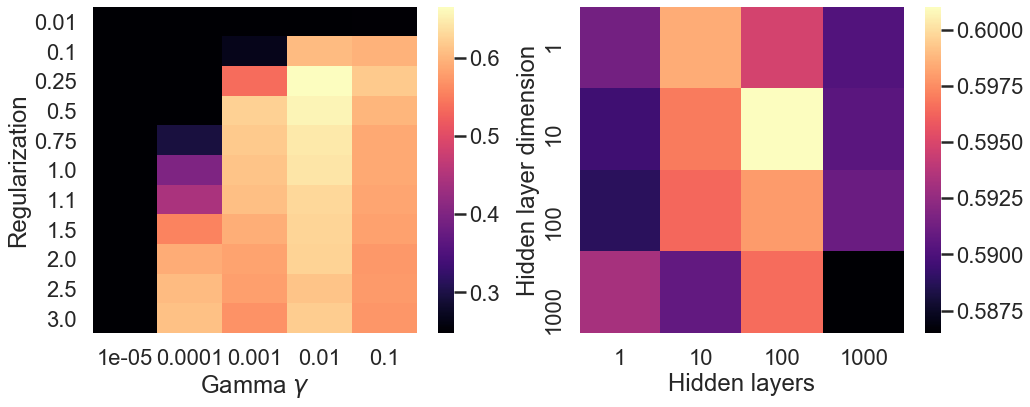

In [29]:
f, ax = plt.subplots(figsize=(16,6), ncols = 2)
sns.heatmap(gamma_reg, cmap="magma", ax=ax[0])
ax[0].set_ylabel("Regularization")
ax[0].set_xlabel("Gamma $\gamma$")
sns.heatmap(network, cmap="magma", ax=ax[1])
ax[1].set_ylabel("Hidden layer dimension")
ax[1].set_xlabel("Hidden layers")

## Best models

In [30]:
# SVM
import time
ng = 1
st = "english"
kernel = "sigmoid"
c = 0.25
gamma = 0.01
TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
ss = StandardScaler(with_mean=False)
us = RandomUnderSampler(random_state=1492)
svc = SVC(kernel = kernel, C= c, gamma=gamma, random_state=1492)
pipe_svm = Pipeline([('tfidf',TFIDF),('ss',ss),('svc',svc)])
tt0 = time.time()
pipe_svm.fit(X_train.values.ravel(), y_train.values.ravel())
print(time.time()-tt0)

1.314249038696289


In [31]:
# MLP
ng = 1
st = "english"
hl = 100
hs = 10
lr = 0.05
TFIDF = TfidfVectorizer(stop_words = st,  ngram_range=(1, ng))
ss = StandardScaler(with_mean=False)
sm = SMOTE(random_state=1492)
MLP_net = MyNet(
            MLP_relu(num_hidden=hl, hidden_dim=hs, output_dim = 4, dropout=0.2),
            max_epochs=50,
            callbacks=[EarlyStopping()],
            lr=lr,
            batch_size = 64,
            device='cpu',
            verbose=0
            )
pipe_mlp = Pipeline_imb([('tfidf', TFIDF), ('ss', ss), ('sm',sm), ('mlp', MLP_net)])
tt0 = time.time()
pipe_mlp.fit(X_train.values.ravel(), y_train.values.ravel())
print(time.time()-tt0)

26.867841720581055


## Model failure

To see the confusion matrices and where the model is failing. 

Text(0.5, 32.40625000000006, 'Predicted label')

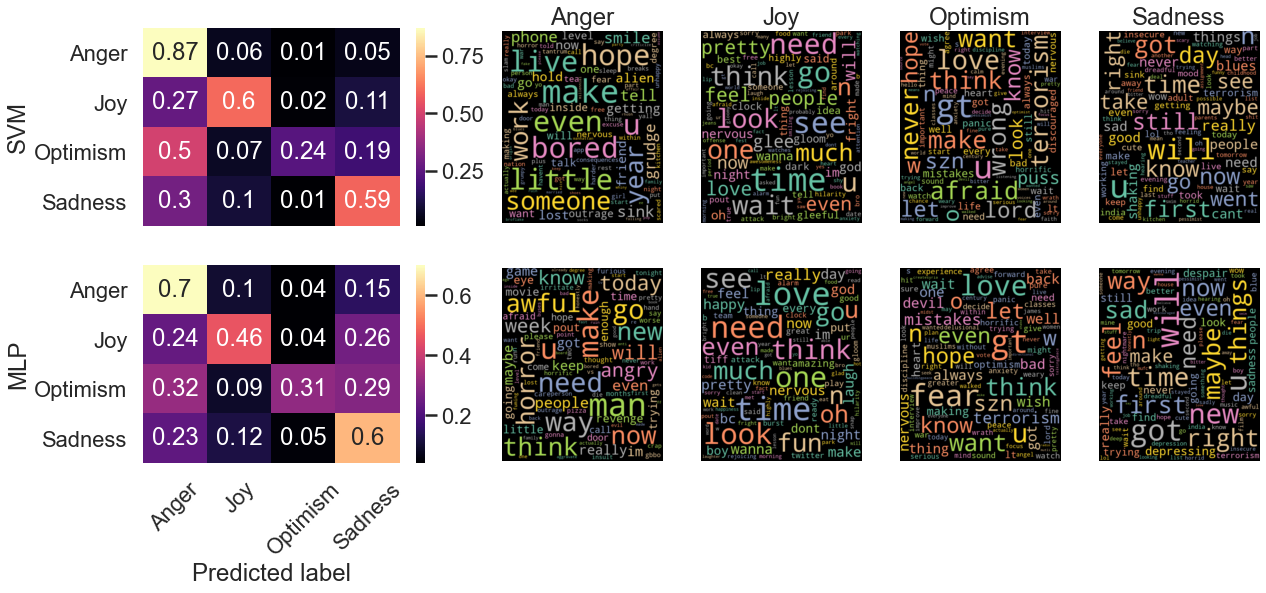

In [32]:
# Imports
from sklearn.metrics import confusion_matrix
from wordcloud import STOPWORDS

# Predicted
pred_svm = pipe_svm.predict(X_test.values.ravel())
pred_mlp = pipe_mlp.predict(X_test.values.ravel())

# Confusion matrices
cm_svm = confusion_matrix(y_test.values.ravel(), pred_svm, normalize="true")
cm_mlp = confusion_matrix(y_test.values.ravel(), pred_mlp, normalize="true")

# Anger wrong
wrong_svm_anger = X_test[(pred_svm!=0) & (y_test.values.ravel()==0)]
text_anger_wrong_svm = " ".join(str(tweet) for tweet in wrong_svm_anger.tweet)
text_anger_wrong_svm = text_anger_wrong_svm.replace("user", " ").replace("amp", " ").lower()
wordcloud_anger_wrong_svm = WordCloud(max_font_size=100, max_words=100, width = 500, height = 600, colormap = "Set2",
                     collocations=False, stopwords=STOPWORDS).generate(text_anger_wrong_svm)
wrong_mlp_anger = X_test[(pred_mlp!=0) & (y_test.values.ravel()==0)]
text_anger_wrong_mlp = " ".join(str(tweet) for tweet in wrong_mlp_anger.tweet)
text_anger_wrong_mlp = text_anger_wrong_mlp.replace("user", " ").replace("amp", " ").lower()
wordcloud_anger_wrong_mlp = WordCloud(max_font_size=100, max_words=100, width = 500, height = 600, colormap = "Set2",
                     collocations=False, stopwords=STOPWORDS).generate(text_anger_wrong_mlp)

# Joy wrong
wrong_svm_joy = X_test[(pred_svm!=1) & (y_test.values.ravel()==1)]
text_joy_wrong_svm = " ".join(str(tweet) for tweet in wrong_svm_joy.tweet)
text_joy_wrong_svm = text_joy_wrong_svm.replace("user", " ").replace("amp", " ").lower()
wordcloud_joy_wrong_svm = WordCloud(max_font_size=100, max_words=100, width = 500, height = 600, colormap = "Set2",
                     collocations=False, stopwords=STOPWORDS).generate(text_joy_wrong_svm)
wrong_mlp_joy = X_test[(pred_mlp!=1) & (y_test.values.ravel()==1)]
text_joy_wrong_mlp = " ".join(str(tweet) for tweet in wrong_mlp_joy.tweet)
text_joy_wrong_mlp = text_joy_wrong_mlp.replace("user", " ").replace("amp", " ").lower()
wordcloud_joy_wrong_mlp = WordCloud(max_font_size=100, max_words=100, width = 500, height = 600, colormap = "Set2",
                     collocations=False, stopwords=STOPWORDS).generate(text_joy_wrong_mlp)

# Optimism wrong
wrong_svm_opti = X_test[(pred_svm!=2) & (y_test.values.ravel()==2)]
text_opti_wrong_svm = " ".join(str(tweet) for tweet in wrong_svm_opti.tweet)
text_opti_wrong_svm = text_opti_wrong_svm.replace("user", " ").replace("amp", " ").lower()
wordcloud_opti_wrong_svm = WordCloud(max_font_size=100, max_words=100, width = 500, height = 600, colormap = "Set2",
                     collocations=False, stopwords=STOPWORDS).generate(text_opti_wrong_svm)
wrong_mlp_opti = X_test[(pred_mlp!=2) & (y_test.values.ravel()==2)]
text_opti_wrong_mlp = " ".join(str(tweet) for tweet in wrong_mlp_opti.tweet)
text_opti_wrong_mlp = text_opti_wrong_mlp.replace("user", " ").replace("amp", " ").lower()
wordcloud_opti_wrong_mlp = WordCloud(max_font_size=100, max_words=100, width = 500, height = 600, colormap = "Set2",
                     collocations=False, stopwords=STOPWORDS).generate(text_opti_wrong_mlp)

# Sadness wrong
wrong_svm_sad = X_test[(pred_svm!=3) & (y_test.values.ravel()==3)]
text_sad_wrong_svm = " ".join(str(tweet) for tweet in wrong_svm_sad.tweet)
text_sad_wrong_svm = text_sad_wrong_svm.replace("user", " ").replace("amp", " ").lower()
wordcloud_sad_wrong_svm = WordCloud(max_font_size=100, max_words=100, width = 500, height = 600, colormap = "Set2",
                     collocations=False, stopwords=STOPWORDS).generate(text_sad_wrong_svm)
wrong_mlp_sad = X_test[(pred_mlp!=3) & (y_test.values.ravel()==3)]
text_sad_wrong_mlp = " ".join(str(tweet) for tweet in wrong_mlp_sad.tweet)
text_sad_wrong_mlp = text_sad_wrong_mlp.replace("user", " ").replace("amp", " ").lower()
wordcloud_sad_wrong_mlp = WordCloud(max_font_size=100, max_words=100, width = 500, height = 600, colormap = "Set2",
                     collocations=False, stopwords=STOPWORDS).generate(text_sad_wrong_mlp)

# Plots
f, ax = plt.subplots(ncols = 5, nrows=2, figsize=(20,8), gridspec_kw={'width_ratios': [2, 1, 1, 1, 1]})

# Confusion matrices plots
sns.heatmap(np.round(cm_svm,2), ax=ax[0][0], xticklabels = ["Anger","Joy","Optimism","Sadness"], 
            yticklabels = ["Anger","Joy","Optimism","Sadness"], annot=True, cmap="magma")
ax[0][0].set_xticks([])
sns.heatmap(np.round(cm_mlp,2), ax=ax[1][0], xticklabels = ["Anger","Joy","Optimism","Sadness"], 
            yticklabels = ["Anger","Joy","Optimism","Sadness"], annot=True, cmap="magma")
ax[1][0].set_xticklabels(["Anger","Joy","Optimism","Sadness"],rotation=45)

# Anger wrong
ax[0][1].imshow(wordcloud_anger_wrong_svm, interpolation='bilinear')
ax[0][1].axis('off')
ax[1][1].imshow(wordcloud_anger_wrong_mlp, interpolation='bilinear')
ax[1][1].axis('off')

# Joy wrong
ax[0][2].imshow(wordcloud_joy_wrong_svm, interpolation='bilinear')
ax[0][2].axis('off')
ax[1][2].imshow(wordcloud_joy_wrong_mlp, interpolation='bilinear')
ax[1][2].axis('off')

# Optimism wrong
ax[0][3].imshow(wordcloud_opti_wrong_svm, interpolation='bilinear')
ax[0][3].axis('off')
ax[1][3].imshow(wordcloud_opti_wrong_mlp, interpolation='bilinear')
ax[1][3].axis('off')

# Sadness wrong
ax[0][4].imshow(wordcloud_sad_wrong_svm, interpolation='bilinear')
ax[0][4].axis('off')
ax[1][4].imshow(wordcloud_sad_wrong_mlp, interpolation='bilinear')
ax[1][4].axis('off')

for i in range(2):
    for j in range(4):
        ax[i][j].grid(False)

ax[0][1].set_title("Anger")
ax[0][2].set_title("Joy")
ax[0][3].set_title("Optimism")
ax[0][4].set_title("Sadness")
ax[0][0].set_ylabel("SVM")
ax[1][0].set_ylabel("MLP")
ax[1][0].set_xlabel("Predicted label")

## Saving the models

In [33]:
from joblib import dump
dump(pipe_svm, 'Models/svm.joblib') 

['Models/svm.joblib']

In [34]:
import pickle
with open('Models/mlp.pkl', 'wb') as f:
    pickle.dump(pipe_mlp, f)